# Getting all the paths

In [50]:
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import ShuffleSplit, cross_val_score
from sklearn.pipeline import Pipeline

from mne import Epochs, events_from_annotations, pick_types
from mne.channels import make_standard_montage
from mne.datasets import eegbci
from mne.decoding import CSP
from mne.io import concatenate_raws, read_raw_edf
import librosa.display

In [51]:
data_path=[]
event_data_path=[]
data_path.append("C:/Users/akans/OneDrive/Documents/Documents/College/6 - Sem/BCI/BCI Dataset/H S1 EO.edf")
data_path.append("C:/Users/akans/OneDrive/Documents/Documents/College/6 - Sem/BCI/BCI Dataset/H S1 EC.edf")
data_path.append("C:/Users/akans/OneDrive/Documents/Documents/College/6 - Sem/BCI/BCI Dataset/H S1 TASK.edf")
data_path.append("C:/Users/akans/OneDrive/Documents/Documents/College/6 - Sem/BCI/BCI Dataset/MDD S1 EO.edf")
data_path.append("C:/Users/akans/OneDrive/Documents/Documents/College/6 - Sem/BCI/BCI Dataset/MDD S1 EC.edf")
data_path.append("C:/Users/akans/OneDrive/Documents/Documents/College/6 - Sem/BCI/BCI Dataset/MDD S1 TASK.edf")


# Importing all the paths

In [52]:
raw=[]
for i  in range(6):
    raw.append(mne.io.read_raw_edf(data_path[i], preload=True))

Extracting EDF parameters from C:\Users\akans\OneDrive\Documents\Documents\College\6 - Sem\BCI\BCI Dataset\H S1 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 89855  =      0.000 ...   350.996 secs...
Extracting EDF parameters from C:\Users\akans\OneDrive\Documents\Documents\College\6 - Sem\BCI\BCI Dataset\H S1 EC.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 76799  =      0.000 ...   299.996 secs...
Extracting EDF parameters from C:\Users\akans\OneDrive\Documents\Documents\College\6 - Sem\BCI\BCI Dataset\H S1 TASK.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 154879  =      0.000 ...   604.996 secs...
Extracting EDF parameters from C:\Users\akans\OneDrive\Documents\Documents\College\6 - Sem\BCI\BCI Dataset\MDD S1 EO.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading

In [53]:
raw[0]

<RawEDF | H S1 EO.edf, 22 x 89856 (351.0 s), ~15.1 MB, data loaded>

In [54]:
raw[1]

<RawEDF | H S1 EC.edf, 22 x 76800 (300.0 s), ~12.9 MB, data loaded>

In [55]:
raw[2]

<RawEDF | H S1 TASK.edf, 22 x 154880 (605.0 s), ~26.0 MB, data loaded>

In [56]:
raw[3]

<RawEDF | MDD S1 EO.edf, 20 x 77056 (301.0 s), ~11.8 MB, data loaded>

In [57]:
raw[4]

<RawEDF | MDD S1 EC.edf, 20 x 77568 (303.0 s), ~11.9 MB, data loaded>

In [58]:
raw[5]

<RawEDF | MDD S1 TASK.edf, 22 x 161792 (632.0 s), ~27.2 MB, data loaded>

In [59]:
for i in range(len(raw)):
    print(raw[i].ch_names)
    print(len(raw[i].ch_names))

['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
22
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
22
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE', 'EEG A2-A1', 'EEG 23A-23R', 'EEG 24A-24R']
22
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG F

In [60]:
for i in range(len(raw)):
    print(i)
    if(len(raw[i].ch_names)==22):
        raw[i].drop_channels(['EEG A2-A1','EEG 23A-23R','EEG 24A-24R'])
    else:
        raw[i].drop_channels(['EEG A2-A1'])


0
1
2
3
4
5


In [61]:
for i in range(len(raw)):
    print(raw[i].ch_names)

['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE']
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE']
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE']
['EEG Fp1-LE', 'EEG F3-LE', 'EEG C3-LE', 'EEG P3-LE', 'EEG O1-LE', 'EEG F7-LE', 'EEG T3-LE', 'EEG T5-LE', 'EEG Fz-LE', 'EEG Fp2-LE', 'EEG F4-LE', 'EEG C4-LE', 'EEG P4-LE', 'EEG O2-LE', 'EEG F8-LE', 'EEG T4-LE', 'EEG T6-LE', 'EEG Cz-LE', 'EEG Pz-LE']


# Correcting the channel mapping of all the raw data

In [62]:
channel_mapping = {
    'EEG Fp1-LE': 'Fp1',
    'EEG F3-LE': 'F3',
    'EEG C3-LE': 'C3',
    'EEG P3-LE': 'P3',
    'EEG O1-LE': 'O1',
    'EEG F7-LE': 'F7',
    'EEG T3-LE': 'T3',
    'EEG T5-LE': 'T5',
    'EEG Fz-LE': 'Fz',
    'EEG Fp2-LE': 'Fp2',
    'EEG F4-LE': 'F4',
    'EEG C4-LE': 'C4',
    'EEG P4-LE': 'P4',
    'EEG O2-LE': 'O2',
    'EEG F8-LE': 'F8',
    'EEG T4-LE': 'T4',
    'EEG T6-LE': 'T6',
    'EEG Cz-LE': 'Cz',
    'EEG Pz-LE': 'Pz',   
}

for i in range(len(raw)):
    # Remove overlapping channels
    raw[i].rename_channels(channel_mapping)
    raw[i].set_montage('standard_1020')
    # # Channels to remove
    # channels_to_remove = ['T7', 'T8', 'T4','T3']
    # # Drop channels from the raw data
    # raw[i] = raw[0].drop_channels(channels_to_remove)

In [63]:
raw[0].compute_psd()

Effective window size : 8.000 (s)


<Power Spectrum (from Raw, welch method) | 19 channels × 1025 freqs, 0.0-128.0 Hz>

In [64]:
raw[0].info['ch_names']

['Fp1',
 'F3',
 'C3',
 'P3',
 'O1',
 'F7',
 'T3',
 'T5',
 'Fz',
 'Fp2',
 'F4',
 'C4',
 'P4',
 'O2',
 'F8',
 'T4',
 'T6',
 'Cz',
 'Pz']

In [65]:
raw[0].annotations

<Annotations | 0 segments>

In [66]:
raw_temp = raw[0]
annotations_temp = raw_temp.annotations
print(annotations_temp)

codes_temp = annotations_temp.description

print("Names of 18 Channels")
print(raw_temp.ch_names)
print("Acitivity/Target associated with samples")

print(codes_temp)

annotations=[]
codes=[]

annotations.append(raw[0].annotations)
codes.append(annotations[0].description)


<Annotations | 0 segments>
Names of 18 Channels
['Fp1', 'F3', 'C3', 'P3', 'O1', 'F7', 'T3', 'T5', 'Fz', 'Fp2', 'F4', 'C4', 'P4', 'O2', 'F8', 'T4', 'T6', 'Cz', 'Pz']
Acitivity/Target associated with samples
[]


In [67]:
annotations

[<Annotations | 0 segments>]

In [68]:
codes

[array([], dtype='<U1')]

# Creating Dataframe

In [83]:
dflist=[]
for i in range(len(raw)):
    df = pd.DataFrame(raw[i].get_data().T, columns=raw[i].ch_names)
    df = df[~(df == 0).all(axis=1)]
    dflist.append(df)
    timeArray = np.array([round(x,3) for x in np.arange(0,len(df)/256,0.00390625)])
    print(timeArray)
    print(dflist[i])

[0.00000e+00 4.00000e-03 8.00000e-03 ... 3.50988e+02 3.50992e+02
 3.50996e+02]
                Fp1            F3            C3            P3            O1  \
0      5.632002e-06  5.458261e-06  3.000942e-06  1.570163e-06  1.288786e-06   
1      9.308563e-06  4.940464e-06  3.932064e-06  1.719217e-06  9.452579e-07   
2      1.235015e-05  5.390726e-06  3.119820e-06  1.637812e-06  5.041048e-08   
3      1.218118e-05  6.107442e-06  6.721352e-07  1.509551e-06 -8.860231e-07   
4      8.240712e-06  5.515114e-06 -1.704739e-06  8.943667e-07 -9.217649e-07   
...             ...           ...           ...           ...           ...   
89851  8.638549e-07  1.005696e-06 -1.858081e-06  1.793406e-06 -9.457352e-07   
89852  2.005203e-06  1.862071e-06 -1.071300e-06  2.268213e-06 -2.444050e-07   
89853  1.819694e-06  1.764400e-06 -6.726849e-07  3.278503e-06  4.353272e-07   
89854  7.337579e-07  9.432117e-07  5.675709e-07  4.351220e-06  1.227501e-06   
89855 -1.479776e-07  4.336489e-08  3.487985e-06  4.9

# PCA analysis

In [85]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

def perform_pca(df, n_components=4):
    # Standardize the features by removing the mean and scaling to unit variance
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(df)
    
    # Initialize PCA
    pca = PCA(n_components=n_components)
    
    # Perform PCA
    pca_result = pca.fit_transform(scaled_data)
    
    # Create a DataFrame to hold the PCA results
    pca_df = pd.DataFrame(data=pca_result, columns=[f"PC{i+1}" for i in range(pca_result.shape[1])])
    
    # Explained variance ratio
    explained_variance_ratio = pca.explained_variance_ratio_
    
    return pca_df, explained_variance_ratio

# Perform PCA
pca_df_list=[]
explained_variance_ratio_list=[]

for i in range(len(dflist)):
    print(i)
    pca_df, explained_variance_ratio = perform_pca(dflist[i],n_components=8)
    pca_df_list.append(pca_df)
    explained_variance_ratio_list.append(explained_variance_ratio)

    # Print PCA DataFrame
    print("PCA DataFrame:")
    print(pca_df)

    # Print explained variance ratio
    print("\nExplained Variance Ratio:")
    print(explained_variance_ratio)


0
PCA DataFrame:
            PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     -1.082793 -0.145012  0.277497  0.773290  0.093354 -0.387772 -0.082976   
1     -1.186879 -0.227817 -0.620674  0.871315  0.640492  0.258244  0.270709   
2     -0.982016 -0.323230 -1.321831 -0.350061  1.112682  0.677170  0.394097   
3     -0.331745 -0.444385 -1.443300 -2.605010  1.315387  0.484304  0.102200   
4      0.523927 -0.463137 -0.976227 -4.561806  1.282245  0.044992 -0.560054   
...         ...       ...       ...       ...       ...       ...       ...   
89851  0.709090 -0.193278 -0.256342 -2.362049  0.788737  0.556519  0.202715   
89852  0.229537 -0.696248 -0.545673 -1.932496  0.908354  0.708229 -0.170790   
89853 -0.228182 -1.225271 -0.867085 -0.767820  0.615034  0.479851 -0.532393   
89854 -0.654923 -1.523848 -0.565273  0.499546  0.200454  0.035513 -0.709367   
89855 -1.048968 -1.558030  0.390278  1.222259  0.183004 -0.188869 -0.687225   

            PC8  
0     -0.600476 

# ICA implementation

In [90]:
from mne.preprocessing import ICA

n_components = 10  # number of components to decompose
method = 'fastica'  # ICA method

ica = ICA(n_components=n_components, method=method)

icalist=[]

for i in range(len(raw)):
    icalist.append(ica.fit(raw[i]))

Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.4s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 0.9s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.6s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.3s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 1.3s.
Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 10 components
Fitting ICA took 2.5s.


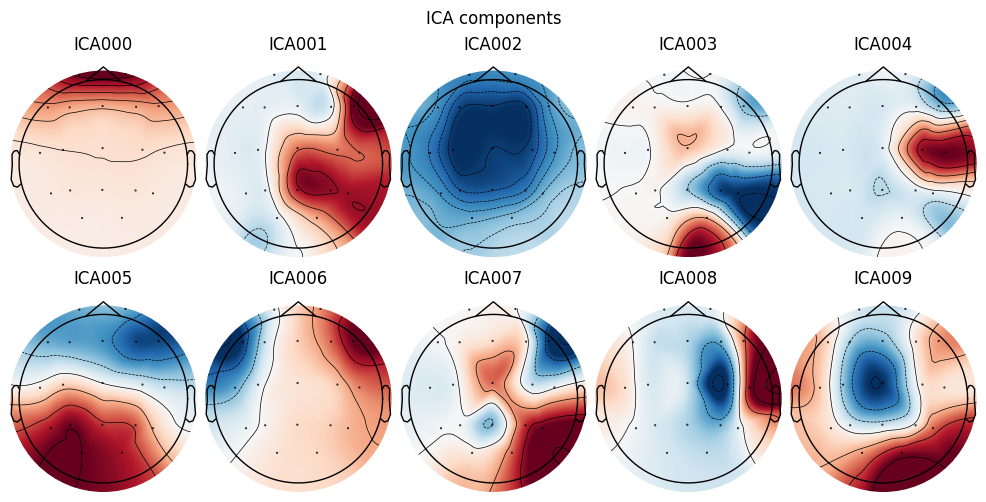

Creating RawArray with float64 data, n_channels=10, n_times=89856
    Range : 0 ... 89855 =      0.000 ...   350.996 secs
Ready.


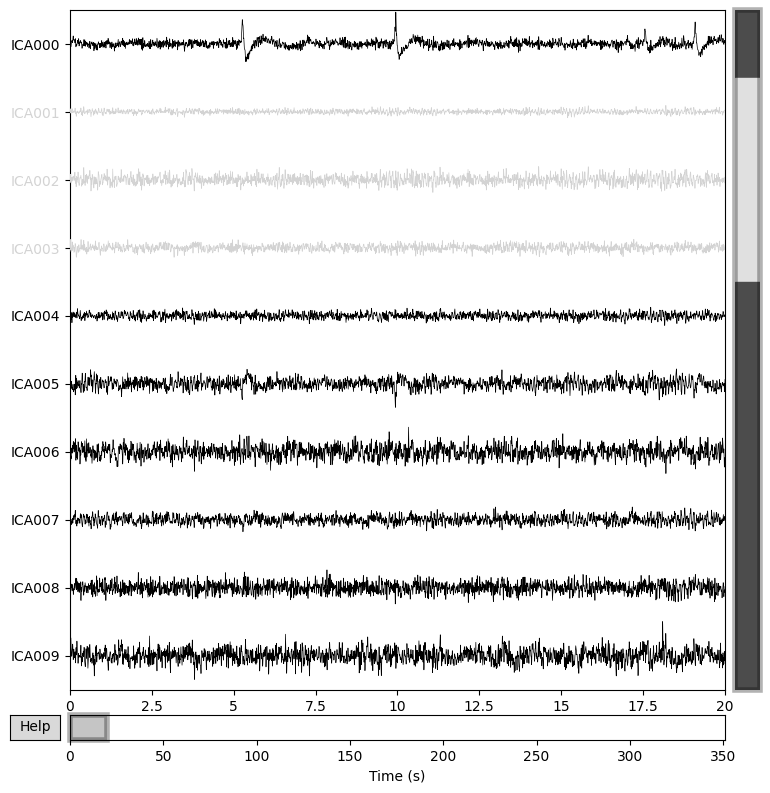

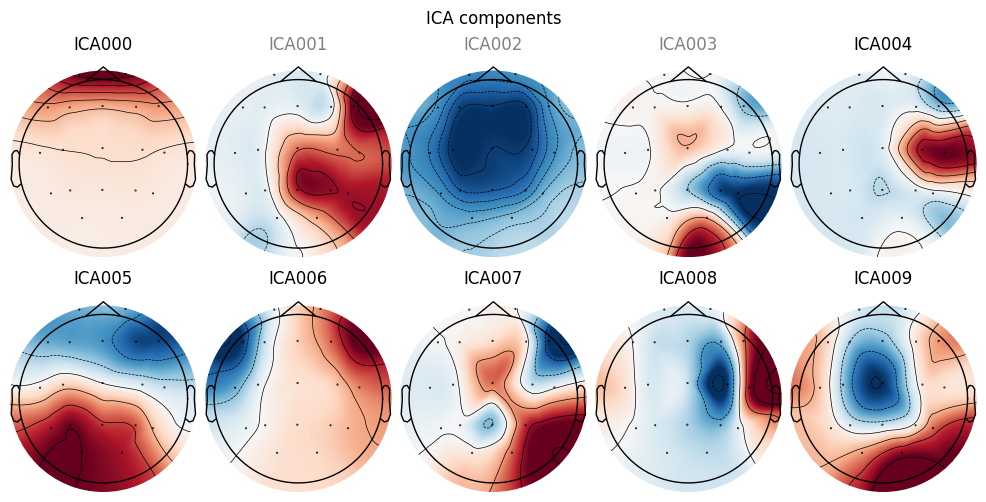

Creating RawArray with float64 data, n_channels=10, n_times=89856
    Range : 0 ... 89855 =      0.000 ...   350.996 secs
Ready.


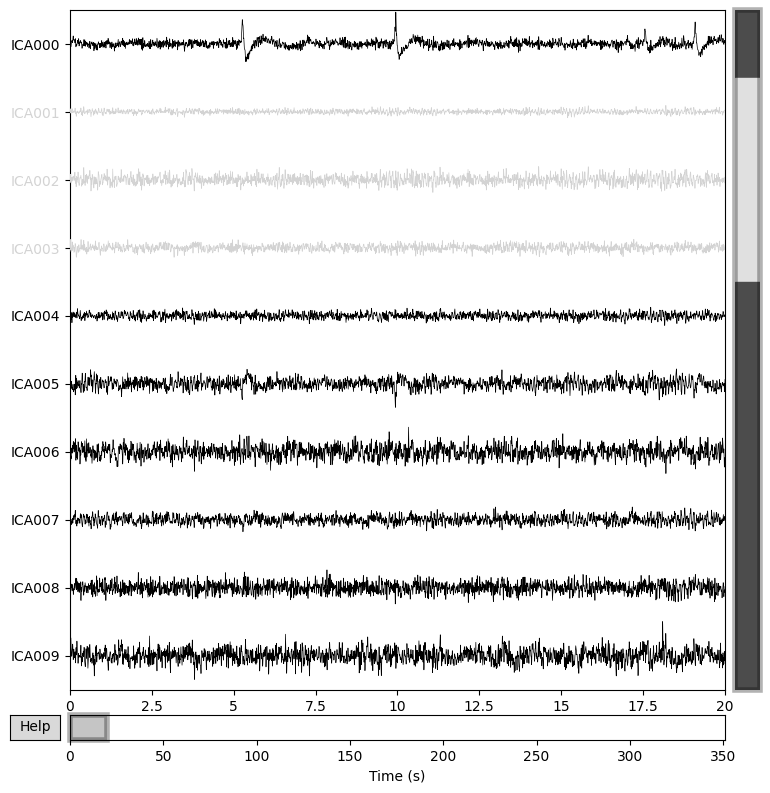

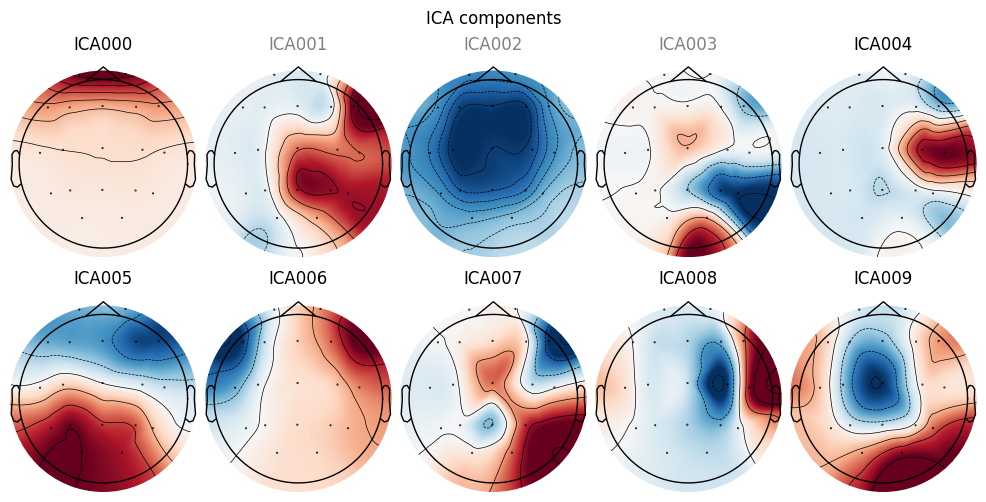

Creating RawArray with float64 data, n_channels=10, n_times=89856
    Range : 0 ... 89855 =      0.000 ...   350.996 secs
Ready.


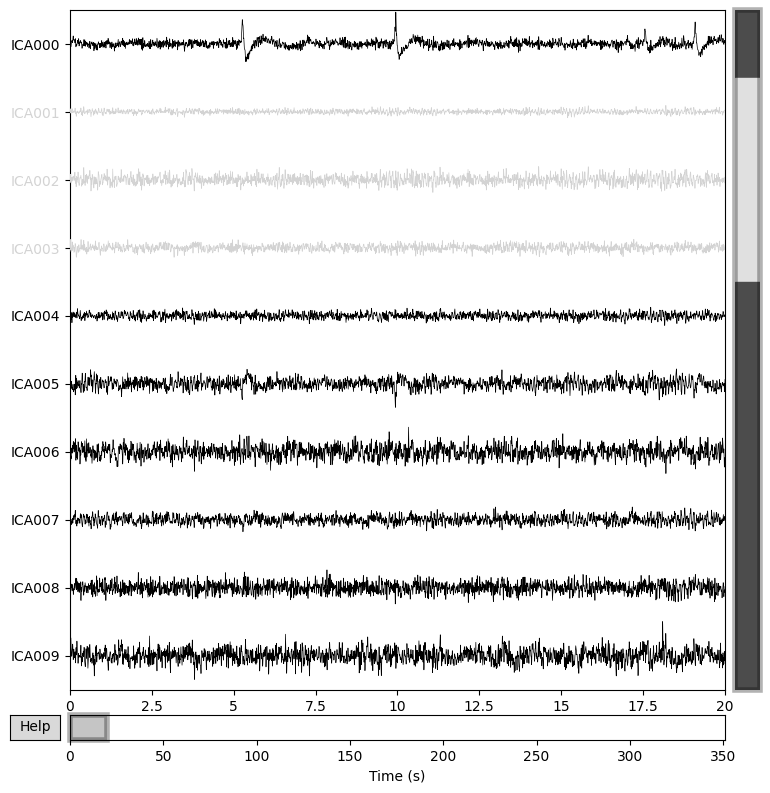

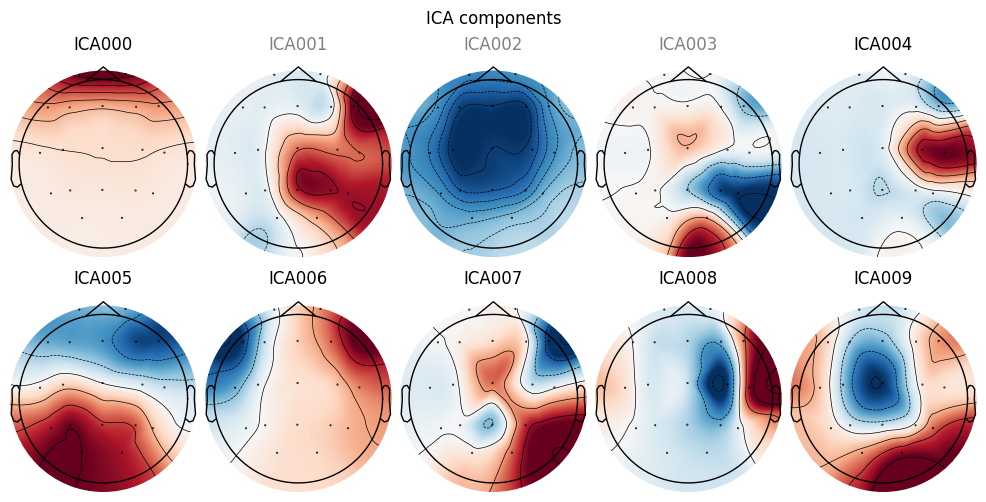

Creating RawArray with float64 data, n_channels=10, n_times=89856
    Range : 0 ... 89855 =      0.000 ...   350.996 secs
Ready.


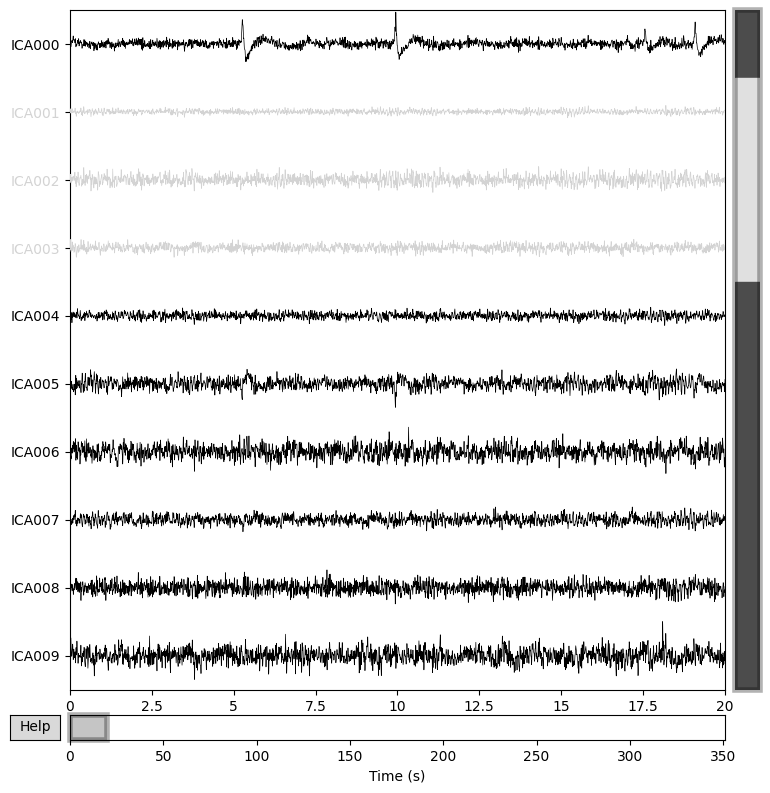

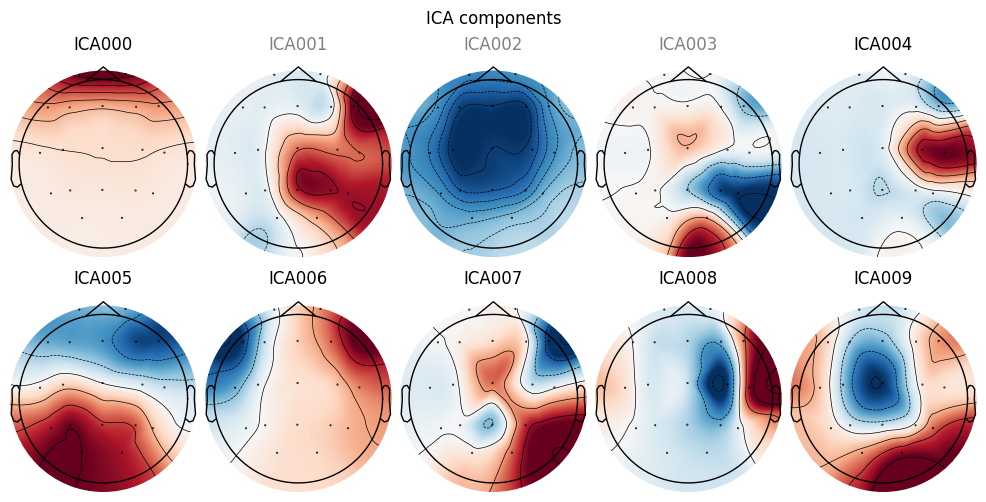

Creating RawArray with float64 data, n_channels=10, n_times=89856
    Range : 0 ... 89855 =      0.000 ...   350.996 secs
Ready.


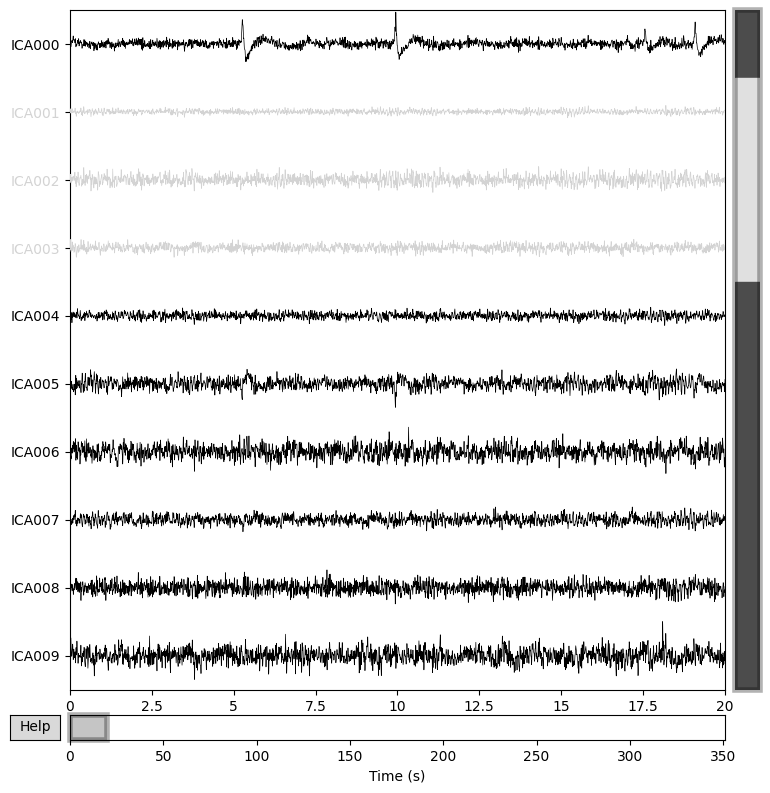

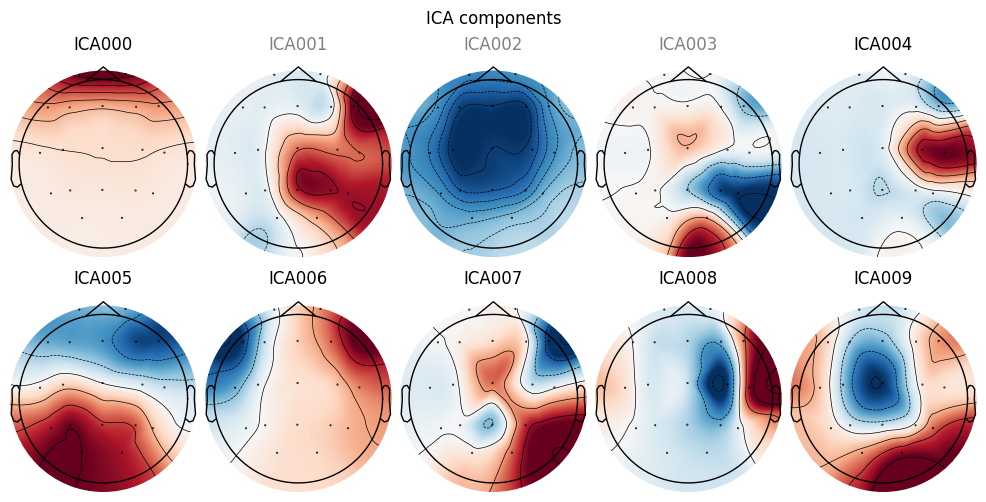

Creating RawArray with float64 data, n_channels=10, n_times=89856
    Range : 0 ... 89855 =      0.000 ...   350.996 secs
Ready.


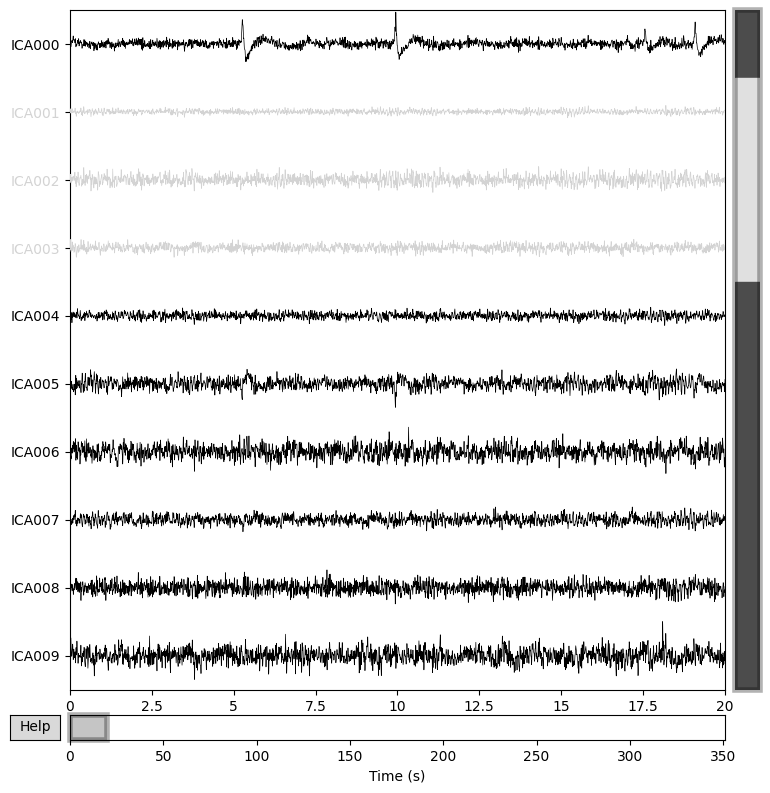

In [91]:
for i in range(len(icalist)):
    # Plot components
    icalist[i].plot_components()

    # Identify artifact components and mark them for exclusion
    # You can also manually reject components by their index
    icalist[i].exclude = [1, 2, 3]  # for example

    # Plot the topomap of components
    icalist[i].plot_sources(raw[0])

In [92]:
templist=[]
for i in range(len(raw)):
    temp = ica.apply(raw[i])
    templist.append(temp)

Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components
Applying ICA to Raw instance
    Transforming to ICA space (10 components)
    Zeroing out 3 ICA components
    Projecting back using 19 PCA components


# CSP Implementation

In [74]:
raw_fnames=[]
raw_fnames.append(data_path[0])
# raw_fnames.append(data_path[0])
# raw_fnames.append(data_path[0])

In [75]:
raw_fnames

['C:/Users/akans/OneDrive/Documents/Documents/College/6 - Sem/BCI/BCI Dataset/H S1 EO.edf']

In [ ]:
tmin, tmax = -1.0, 4.0
event_id = dict(eye=1,hands=2, feet=3)
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet

# raw_fnames = eegbci.load_data(subject, runs)
# raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
raw[0]
eegbci.standardize(raw)  # set channel names
montage = make_standard_montage("standard_1020")
raw[0].set_montage(montage)

# Apply band-pass filter
raw[0].filter(7.0, 30.0, fir_design="firwin", skip_by_annotation="edge")

events, _ = events_from_annotations(raw[0], event_id=dict(T0=1,T1=2, T2=3))

picks = pick_types(raw[0].info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")

# Read epochs (train will be done only between 1 and 2s)
# Testing will be done with a running classifier
epochs = Epochs(
    raw,
    events,
    event_id,
    tmin,
    tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
epochs_train = epochs.copy().crop(tmin=1.0, tmax=2.0)
labels = epochs.events[:, -1] - 2

In [ ]:
tmin, tmax = -1.0, 4.0
event_id = dict(eye=1, hands=2, feet=3)
subject = 1
runs = [6, 10, 14]  # motor imagery: hands vs feet

# raw_fnames = eegbci.load_data(subject, runs)
# raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
# Assuming you have some external labels or annotations
# Define artificial events based on external labels
# For example, if you have a list of labels where 1 corresponds to "hands" and 2 corresponds to "feet"
external_labels = [1, 2, 1, 2, 1, 2]  # assuming the length matches your data

# Define artificial events based on external labels
events = []
for idx, label in enumerate(external_labels):
    events.append([idx, 0, label])

events = np.array(events)

# Define picks and montage
picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude="bads")
montage = make_standard_montage("standard_1020")
raw.set_montage(montage)

# Apply band-pass filter
raw.filter(7.0, 30.0, fir_design="firwin", skip_by_annotation="edge")

# Read epochs
epochs = Epochs(
    raw,
    events,
    event_id,
    tmin,
    tmax,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)

# Define epochs for training
epochs_train = epochs.copy().crop(tmin=1.0, tmax=2.0)

# Define labels for training
labels = epochs.events[:, -1] - 1  # subtracting 1 if your labels are 1 and 2 to make them 0 and 1

# Compute CSP
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)
csp.fit(epochs_train)


In [ ]:
print(epochs.events)
print(len(labels))

Computing rank from data with rank=None
    Using tolerance 0.00015 (2.2e-16 eps * 64 dim * 1e+10  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors


Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00011 (2.2e-16 eps * 64 dim * 8e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 9.1e-05 (2.2e-16 eps * 64 dim * 6.4e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Using tolerance 0.00014 (2.2e-16 eps * 64 dim * 9.8e+09  max singular value)
    Estimated rank (mag): 64
    MAG: rank 64 computed from 64 data channels with 0 projectors
Reducing data rank from 64 -> 64
Estimating covariance using EMPIRICAL
Done.
Computing rank from data with rank=None
    Us

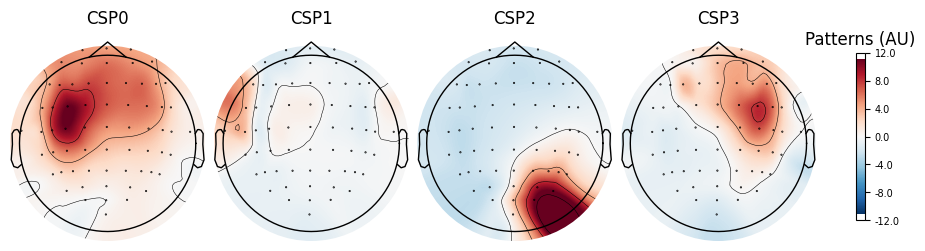

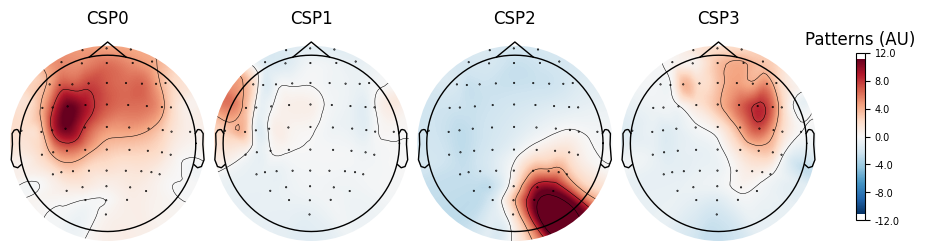

In [ ]:
# Define a monte-carlo cross-validation generator (reduce variance):
scores = []
epochs_data = epochs.get_data(copy=False)
epochs_data_train = epochs_train.get_data(copy=False)
cv = ShuffleSplit(10, test_size=0.2, random_state=42)
cv_split = cv.split(epochs_data_train)

# Assemble a classifier
lda = LinearDiscriminantAnalysis()
csp = CSP(n_components=4, reg=None, log=True, norm_trace=False)

# Use scikit-learn Pipeline with cross_val_score function
clf = Pipeline([("CSP", csp), ("LDA", lda)])
scores = cross_val_score(clf, epochs_data_train, labels, cv=cv, n_jobs=None)

# Printing the results
class_balance = np.mean(labels == labels[0])
class_balance = max(class_balance, 1.0 - class_balance)
print(
    "Classification accuracy: %f / Chance level: %f" % (np.mean(scores), class_balance)
)

# plot CSP patterns estimated on full data for visualization
csp.fit_transform(epochs_data, labels)

csp.plot_patterns(epochs.info, ch_type="eeg", units="Patterns (AU)", size=1.5)

In [ ]:
# csp_patterns=csp.fit_transform(epochs_data, labels)
# fig, axes = plt.subplots(nrows=len(csp_patterns), ncols=1, figsize=(10, len(csp_patterns) * 2))

# for idx, pattern in enumerate(csp_patterns):
#     axes[idx].plot(epochs.times, pattern)
#     axes[idx].set_title(f"CSP Pattern {idx + 1}")
#     axes[idx].set_xlabel('Time (s)')
#     axes[idx].set_ylabel('Amplitude')
#     axes[idx].grid(True)

# plt.tight_layout()
# plt.show()

In [ ]:
from mne.datasets import sample
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA, FastICA

In [ ]:
raw = concatenate_raws([read_raw_edf(f, preload=True) for f in raw_fnames])
events, _ = events_from_annotations(raw, event_id=dict(T0=1,T1=2, T2=3))
event_id = dict(eye=1,hands=2, feet=3)
print(raw)

Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Extracting EDF parameters from d:\IIIT\IIIT_Shri_City\SEMESTER 6\BCI\Project\dataset\files\S001\S001R14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
<RawEDF | S001R06.edf, 64 x 60000 (375.0 s), ~29.3 MB, data loaded>


Not setting metadata
90 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 90 events and 113 original time points ...
3 bad epochs dropped


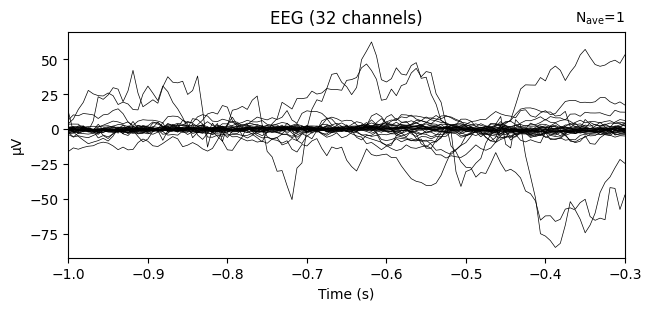

In [ ]:
picks = pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False)
epochs_new = Epochs(
    raw,
    events,
    event_id,
    proj=True,
    picks=picks,
    baseline=None,
    preload=True,
)
X = epochs_new.get_data(copy=False)
pca = UnsupervisedSpatialFilter(PCA(32), average=False)
pca_data = pca.fit_transform(X)
ev = mne.EvokedArray(
    np.mean(pca_data, axis=0),
    mne.create_info(32, epochs.info["sfreq"], ch_types="eeg"),
    tmin=tmin,
)
ev.plot(show=False, window_title="PCA", time_unit="s")

In [ ]:
print(pca_data.shape)

(87, 32, 113)


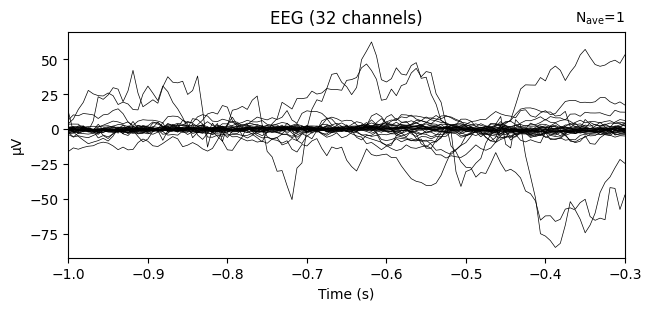

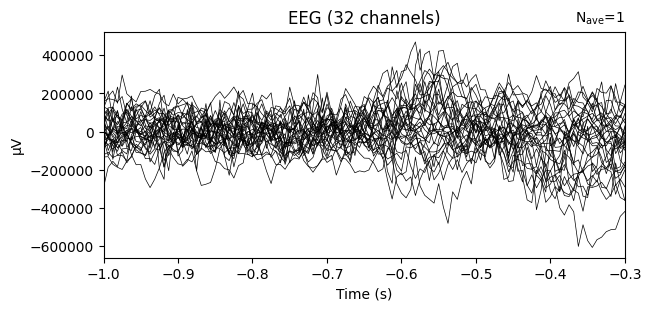

In [ ]:
ica = UnsupervisedSpatialFilter(FastICA(32, whiten="unit-variance"), average=False)
ica_data = ica.fit_transform(X)
ev1 = mne.EvokedArray(
    np.mean(ica_data, axis=0),
    mne.create_info(32, epochs.info["sfreq"], ch_types="eeg"),
    tmin=tmin,
)
ev1.plot(show=False, window_title="ICA", time_unit="s")

plt.show()

In [ ]:
print(ica_data.shape)

(87, 32, 113)
